# Boston Housing Example

In this example we build a regression deep neural network on the boston housing data.

In [51]:
import numpy as np
import datetime
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization 
import matplotlib.pyplot as plt


In [52]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [53]:
# Supporting functions
def plot_history_net(history):
    """Plot the history of the neural network with accuracy, loss, val_loss, val_accuracy"""

    feature_list = list(history.history.keys())
    epoch_range = range(1, len(history.history[feature_list[0]])+1)

    fig, ax = plt.subplots(ncols=len(feature_list), figsize=(25,5))

    for i in range(0, len(feature_list)):
        ax[i].plot(epoch_range, history.history[feature_list[i]], color="navy")
        ax[i].set_title(feature_list[i])

    plt.show()

In [54]:
(X_train, y_train), (X_valid, y_valid) = boston_housing.load_data()

In [55]:
model = Sequential()

model.add(Dense(32, input_dim=13, activation="relu"))
model.add(BatchNormalization())

model.add(Dense(16, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1, activation="linear"))

In [56]:
model.compile(loss="mean_squared_error", optimizer="adam")

In [61]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(
    X_train, y_train,
    batch_size=8, epochs=32, verbose=1,
    validation_data=(X_valid, y_valid),
    callbacks=[tensorboard_callback],
)

Epoch 1/32
51/51 [==============================] - 0s 3ms/step - loss: 46.5726 - val_loss: 31.3081
Epoch 2/32
51/51 [==============================] - 0s 1ms/step - loss: 46.0803 - val_loss: 28.0686
Epoch 3/32
51/51 [==============================] - 0s 1ms/step - loss: 47.0053 - val_loss: 32.6642
Epoch 4/32
51/51 [==============================] - 0s 2ms/step - loss: 44.5509 - val_loss: 26.1669
Epoch 5/32
51/51 [==============================] - 0s 2ms/step - loss: 43.0252 - val_loss: 26.4339
Epoch 6/32
51/51 [==============================] - 0s 2ms/step - loss: 39.7936 - val_loss: 27.0202
Epoch 7/32
51/51 [==============================] - 0s 2ms/step - loss: 46.0435 - val_loss: 36.3811
Epoch 8/32
51/51 [==============================] - 0s 2ms/step - loss: 42.0780 - val_loss: 49.9480
Epoch 9/32
51/51 [==============================] - 0s 2ms/step - loss: 43.3507 - val_loss: 23.9646
Epoch 10/32
51/51 [==============================] - 0s 3ms/step - loss: 40.9299 - val_loss: 29.2412

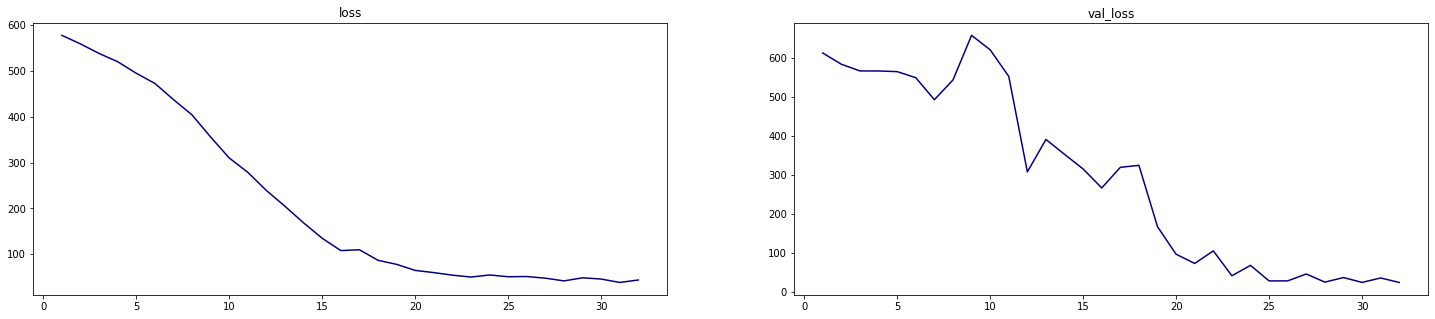

In [58]:
plot_history_net(history=history)

In [59]:
model.predict(np.reshape(X_valid[42], [1, 13]))

array([[18.942265]], dtype=float32)

In [85]:
%tensorboard --logdir logs/fit --port 6006

'kill' is not recognized as an internal or external command,
operable program or batch file.
